# Web scraping

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import os

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []


In [3]:

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | I was meant to fly in January t...
1,✅ Trip Verified | We have flown repeatedly wi...
2,✅ Trip Verified | I was horrified by the extr...
3,✅ Trip Verified | \r\nThe worst cabin experie...
4,✅ Trip Verified | First time flying with Briti...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [7]:
df

,reviews
0,I was meant to fly in January to Algeria. I p...
1,We have flown repeatedly with British Airway...
2,I was horrified by the extremely small seats...
3,\r\nThe worst cabin experience ever: cramped...
4,First time flying with British Airways and fi...
...,...
995,London to Hamburg. Typically if I fly BA it ...
996,Turin to London Gatwick. Rubbish check-in ser...
997,When I checked in the evening before for the...
998,BA’s reputation has been declining for years...


# Data preprocessing 

 Cleaning the data

In [8]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...
1,We have flown repeatedly with British Airway...,We have flown repeatedly with British Airways...
2,I was horrified by the extremely small seats...,I was horrified by the extremely small seats ...
3,\r\nThe worst cabin experience ever: cramped...,The worst cabin experience ever cramped seats...
4,First time flying with British Airways and fi...,First time flying with British Airways and fi...


NLTK is a popular Python library used for
natural language processing (NLP) tasks such as tokenization, stemming, tagging, parsing, and more.

In [9]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rutik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rutik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rutik\AppData\Roaming\nltk_data...


In [10]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rutik\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rutik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,..."
1,We have flown repeatedly with British Airway...,We have flown repeatedly with British Airways...,"[(flown, v), (repeatedly, r), (British, a), (A..."
2,I was horrified by the extremely small seats...,I was horrified by the extremely small seats ...,"[(horrified, v), (extremely, r), (small, a), (..."
3,\r\nThe worst cabin experience ever: cramped...,The worst cabin experience ever cramped seats...,"[(worst, a), (cabin, n), (experience, n), (eve..."
4,First time flying with British Airways and fi...,First time flying with British Airways and fi...,"[(First, a), (time, n), (flying, v), (British,..."


In [11]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,...",mean fly January Algeria pay ticket day mean...
1,We have flown repeatedly with British Airway...,We have flown repeatedly with British Airways...,"[(flown, v), (repeatedly, r), (British, a), (A...",fly repeatedly British Airways One World all...
2,I was horrified by the extremely small seats...,I was horrified by the extremely small seats ...,"[(horrified, v), (extremely, r), (small, a), (...",horrify extremely small seat poor training c...
3,\r\nThe worst cabin experience ever: cramped...,The worst cabin experience ever cramped seats...,"[(worst, a), (cabin, n), (experience, n), (eve...",bad cabin experience ever cramp seat low cos...
4,First time flying with British Airways and fi...,First time flying with British Airways and fi...,"[(First, a), (time, n), (flying, v), (British,...",First time fly British Airways first time fl...


In [12]:
df[['reviews','Lemma']]

,reviews,Lemma
0,I was meant to fly in January to Algeria. I p...,mean fly January Algeria pay ticket day mean...
1,We have flown repeatedly with British Airway...,fly repeatedly British Airways One World all...
2,I was horrified by the extremely small seats...,horrify extremely small seat poor training c...
3,\r\nThe worst cabin experience ever: cramped...,bad cabin experience ever cramp seat low cos...
4,First time flying with British Airways and fi...,First time fly British Airways first time fl...
...,...,...
995,London to Hamburg. Typically if I fly BA it ...,London Hamburg Typically fly BA SFO LAX LHR ...
996,Turin to London Gatwick. Rubbish check-in ser...,Turin London Gatwick Rubbish check service b...
997,When I checked in the evening before for the...,check evening flight look like seat occupy h...
998,BA’s reputation has been declining for years...,BA reputation decline year use various reaso...


# Sentiment Analysis using VADER

VADER (Valence Aware Dictionary and Sentiment Reasoner).
Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [14]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I was meant to fly in January to Algeria. I p...,I was meant to fly in January to Algeria I pa...,"[(meant, v), (fly, v), (January, n), (Algeria,...",mean fly January Algeria pay ticket day mean...,-0.5994,Negative
1,We have flown repeatedly with British Airway...,We have flown repeatedly with British Airways...,"[(flown, v), (repeatedly, r), (British, a), (A...",fly repeatedly British Airways One World all...,-0.9442,Negative
2,I was horrified by the extremely small seats...,I was horrified by the extremely small seats ...,"[(horrified, v), (extremely, r), (small, a), (...",horrify extremely small seat poor training c...,-0.5507,Negative
3,\r\nThe worst cabin experience ever: cramped...,The worst cabin experience ever cramped seats...,"[(worst, a), (cabin, n), (experience, n), (eve...",bad cabin experience ever cramp seat low cos...,-0.9022,Negative
4,First time flying with British Airways and fi...,First time flying with British Airways and fi...,"[(First, a), (time, n), (flying, v), (British,...",First time fly British Airways first time fl...,0.9844,Positive


# Analysis Counts

In [16]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    526
Negative    366
Neutral     108
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x140b1c6e6d0>,
 [Text(-0.08974975155714607, 1.0963325143839484, 'Positive'),
  Text(-0.2802476564342275, -1.0637016739025673, 'Negative'),
  Text(1.2730372826016982, -0.44930621752440103, 'Neutral')],
 [Text(-0.048954409940261484, 0.5979995533003355, '52.6%'),
  Text(-0.15286235805503315, -0.5802009130377639, '36.6%'),
  Text(0.8015419927492173, -0.2828965073301784, '10.8%')])

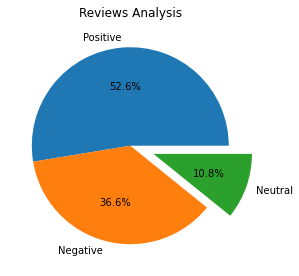

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [19]:
df.to_csv("BA_reviews.csv")